In [3]:
%matplotlib inline
import os

import intake
import satsearch
from satsearch import Search

import ast
import pandas as pd
import numpy as np
import xarray as xr

import geopandas as gpd
import rasterio
import rioxarray

import dask
from dask.diagnostics import ProgressBar
#import dask.distributed

#import geoviews as gv
#import hvplot.pandas
from ipywidgets import interact
from IPython.display import display, Image


In [4]:
env = dict(GDAL_DISABLE_READDIR_ON_OPEN='EMPTY_DIR', 
           AWS_NO_SIGN_REQUEST='YES',
           GDAL_MAX_RAW_BLOCK_CACHE_SIZE='250000000',
           GDAL_SWATH_SIZE='250000000',
           VSI_CURL_CACHE_SIZE='250000000')
os.environ.update(env)

In [5]:
bbox = [35.48, -3.24, 35.58, -3.14] # (min lon, min lat, max lon, max lat)
bbox = [129.0000000000000000,-39.0000000000000000, 141.0000000000000000,-26.0000000000000000]
bbox = [138.54207373854032 - 0.01, -34.934374426311145 - 0.01, 138.54207373854032 + 0.01, -34.934374426311145 + 0.01]
#bbox = [138.54207373854032 - 0.5, -34.934374426311145 - 0.5, 138.54207373854032 + 0.5, -34.934374426311145 + 0.5]

dates = '2017-01-01/2020-12-31'

URL='https://earth-search.aws.element84.com/v0'
results = satsearch.Search.search(url=URL,
                                  collections=['sentinel-s2-l2a-cogs'], # note collection='sentinel-s2-l2a-cogs' doesn't work
                                  datetime=dates,
                                  bbox=bbox,   
                                  #property=["eo:cloud_cover<1"],
                                  #query={'eo:cloud_cover': {'lt': 1}},
                                  query={'eo:cloud_cover': {'eq': 0}, 'platform':{'eq': 'sentinel-2a'}},
                                  sort=['<datetime'])

In [6]:
print('%s items' % results.found())
items = results.items()
# Save this locally for use later
#items.save('my-s2-l2a-cogs-sa-cloudcover1.json')
items.save('my-s2-l2a-cogs-sa-cloudcover0OZLocation.geojson')

40 items


In [7]:
catalog = intake.open_stac_item_collection(results.items())

In [8]:
import geopandas as gpd
#gf = gpd.read_file('my-s2-l2a-cogs-sa-cloudcover1.geojson')
gf2 = gpd.read_file('my-s2-l2a-cogs-sa-cloudcover0OZLocation.geojson')

In [9]:
gf2.head()

id                   datetime     platform  \
0  S2A_54HTG_20201220_0_L2A  2020-12-20T00:56:43+00:00  sentinel-2a   
1  S2A_54HTG_20201130_0_L2A  2020-11-30T00:56:45+00:00  sentinel-2a   
2  S2A_54HTG_20201117_0_L2A  2020-11-17T00:46:52+00:00  sentinel-2a   
3  S2A_54HTG_20200829_0_L2A  2020-08-29T00:46:54+00:00  sentinel-2a   
4  S2A_54HTG_20200819_0_L2A  2020-08-19T00:46:54+00:00  sentinel-2a   

  constellation  gsd  view:off_nadir  proj:epsg  sentinel:utm_zone  \
0    sentinel-2   10               0      32754                 54   
1    sentinel-2   10               0      32754                 54   
2    sentinel-2   10               0      32754                 54   
3    sentinel-2   10               0      32754                 54   
4    sentinel-2   10               0      32754                 54   

  sentinel:latitude_band sentinel:grid_square sentinel:sequence  \
0                      H                   TG                 0   
1                      H                   TG                 0   
2                      H                   TG                 0   
3                      H                   TG                 0   
4                      H                   TG                 0   

                                 sentinel:product_id  sentinel:data_coverage  \
0  S2A_MSIL2A_20201220T004701_N0214_R102_T54HTG_2...                   99.80   
1  S2A_MSIL2A_20201130T004711_N0214_R102_T54HTG_2...                   99.84   
2  S2A_MSIL2A_20201117T003711_N0214_R059_T54HTG_2...                   61.38   
3  S2A_MSIL2A_20200829T003711_N0214_R059_T54HTG_2...                   61.31   
4  S2A_MSIL2A_20200819T003711_N0214_R059_T54HTG_2...                   61.32   

   eo:cloud_cover  sentinel:valid_cloud_cover  \
0               0                        True   
1               0                        True   
2               0                        True   
3               0                       False   
4               0                       False   

                            created                           updated  \
0  2020-12-20T06:18:58.775002+00:00  2020-12-20T06:18:58.775002+00:00   
1  2020-11-30T07:13:47.674000+00:00  2020-11-30T07:13:47.674000+00:00   
2  2020-11-17T05:53:27.379000+00:00  2020-11-17T05:53:27.379000+00:00   
3  2020-08-29T06:53:02.125000+00:00  2020-08-29T06:53:02.125000+00:00   
4  2020-08-20T00:25:47.097000+00:00  2020-08-20T00:25:47.097000+00:00   

   data_coverage                                           geometry  
0            NaN  POLYGON ((138.87370 -35.31256, 137.70126 -35.2...  
1            NaN  POLYGON ((138.87711 -35.31261, 137.70126 -35.2...  
2            NaN  POLYGON ((138.90758 -35.31315, 138.02743 -35.2...  
3            NaN  POLYGON ((138.90758 -35.31315, 138.02787 -35.2...  
4            NaN  POLYGON ((138.90758 -35.31315, 138.02765 -35.2...

In [23]:
item = catalog['S2A_54HTG_20201220_0_L2A']

In [24]:
item

S2A_54HTG_20201220_0_L2A:
  args:
    stac_obj: !!python/object:satstac.item.Item
      _assets_by_common_name: null
      _collection: !!python/object:satstac.collection.Collection
        _data:
          description: Sentinel-2a and Sentinel-2b imagery, processed to Level 2A
            (Surface Reflectance) and converted to Cloud-Optimized GeoTIFFs
          extent:
            spatial:
              bbox:
              - - -180
                - -90
                - 180
                - 90
            temporal:
              interval:
              - - '2015-06-27T10:25:31.456000Z'
                - null
          id: sentinel-s2-l2a-cogs
          item_assets:
            AOT:
              roles:
              - data
              title: Aerosol Optical Thickness (AOT)
              type: image/tiff; application=geotiff; profile=cloud-optimized
            B01:
              eo:bands:
              - center_wavelength: 0.4439
                common_name: coastal
              

In [25]:
item['overview']
item['metadata']
item['info']

info:
  args:
    urlpath: https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/54/H/TG/2020/12/20/0/tileInfo.json
  description: Original JSON metadata
  driver: intake.source.textfiles.TextFilesSource
  metadata:
    catalog_dir: ''
    href: https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/54/H/TG/2020/12/20/0/tileInfo.json
    roles:
    - metadata
    title: Original JSON metadata
    type: application/json


In [26]:
for x in list(item):  #catalog version
    print(x)

thumbnail
overview
info
metadata
visual
B01
B02
B03
B04
B05
B06
B07
B08
B8A
B09
B11
B12
AOT
WVP
SCL


In [29]:
items[0]

S2A_54HTG_20201220_0_L2A

In [10]:
def get_STAC_items(url, collection, dates, bbox):
    results = Search.search(url=url,
                        collections=[collection], 
                        datetime=dates,
                        bbox=bbox,    
                        query={'eo:cloud_cover': {'eq': 0}, 'platform':{'eq': 'sentinel-2a'}},
                        sortby=['-properties.datetime'])

    items = results.items()
    print(f'Found {len(items)} Items')
    
    return intake.open_stac_item_collection(items)

In [11]:
from satsearch import Search

In [12]:
URL2='https://earth-search.aws.element84.com/v0'
collection2 = 'sentinel-s2-l2a-cogs' # sentinel-2 w/ atmospheric corrections
from satsearch import Search
items_s2 = get_STAC_items(URL2, collection2, dates, bbox)

#query={'eo:cloud_cover': {'eq': 0}, 'platform':{'eq': 'sentinel-2a'}},


Found 40 Items


In [13]:
gf2function = items_s2.to_geopandas()

C:\Users\rscott\AppData\Local\Continuum\anaconda3\envs\pangeo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [14]:
gf2function.head()

geometry              datetime  \
0  POLYGON ((138.87370 -35.31256, 137.70126 -35.2...  2020-12-20T00:56:43Z   
1  POLYGON ((138.87711 -35.31261, 137.70126 -35.2...  2020-11-30T00:56:45Z   
2  POLYGON ((138.90758 -35.31315, 138.02743 -35.2...  2020-11-17T00:46:52Z   
3  POLYGON ((138.90758 -35.31315, 138.02787 -35.2...  2020-08-29T00:46:54Z   
4  POLYGON ((138.90758 -35.31315, 138.02765 -35.2...  2020-08-19T00:46:54Z   

      platform constellation instruments  gsd  view:off_nadir  proj:epsg  \
0  sentinel-2a    sentinel-2       [msi]   10               0      32754   
1  sentinel-2a    sentinel-2       [msi]   10               0      32754   
2  sentinel-2a    sentinel-2       [msi]   10               0      32754   
3  sentinel-2a    sentinel-2       [msi]   10               0      32754   
4  sentinel-2a    sentinel-2       [msi]   10               0      32754   

   sentinel:utm_zone sentinel:latitude_band sentinel:grid_square  \
0                 54                      H                   TG   
1                 54                      H                   TG   
2                 54                      H                   TG   
3                 54                      H                   TG   
4                 54                      H                   TG   

  sentinel:sequence                                sentinel:product_id  \
0                 0  S2A_MSIL2A_20201220T004701_N0214_R102_T54HTG_2...   
1                 0  S2A_MSIL2A_20201130T004711_N0214_R102_T54HTG_2...   
2                 0  S2A_MSIL2A_20201117T003711_N0214_R059_T54HTG_2...   
3                 0  S2A_MSIL2A_20200829T003711_N0214_R059_T54HTG_2...   
4                 0  S2A_MSIL2A_20200819T003711_N0214_R059_T54HTG_2...   

   sentinel:data_coverage  eo:cloud_cover  sentinel:valid_cloud_cover  \
0                   99.80               0                        True   
1                   99.84               0                        True   
2                   61.38               0                        True   
3                   61.31               0                       False   
4                   61.32               0                       False   

                    created                   updated  data_coverage  
0  2020-12-20T06:18:58.775Z  2020-12-20T06:18:58.775Z            NaN  
1  2020-11-30T07:13:47.674Z  2020-11-30T07:13:47.674Z            NaN  
2  2020-11-17T05:53:27.379Z  2020-11-17T05:53:27.379Z            NaN  
3  2020-08-29T06:53:02.125Z  2020-08-29T06:53:02.125Z            NaN  
4  2020-08-20T00:25:47.097Z  2020-08-20T00:25:47.097Z            NaN

In [16]:
for x in items_s2:
    junk = items_s2[x]
    break

In [17]:
junk['B02'].metadata['eo:bands'][0]['common_name']

'blue'

In [18]:
junk['B03']

B03:
  args:
    chunks: {}
    urlpath: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/H/TG/2020/12/S2A_54HTG_20201220_0_L2A/B03.tif
  description: Band 3 (green)
  driver: intake_xarray.raster.RasterIOSource
  metadata:
    catalog_dir: ''
    eo:bands:
    - center_wavelength: 0.56
      common_name: green
      full_width_half_max: 0.045
      name: B03
    gsd: 10
    href: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/H/TG/2020/12/S2A_54HTG_20201220_0_L2A/B03.tif
    plots:
      geotiff:
        cmap: viridis
        data_aspect: 1
        dynamic: true
        frame_width: 500
        kind: image
        rasterize: true
        x: x
        y: y
    proj:shape:
    - 10980
    - 10980
    proj:transform:
    - 10
    - 0
    - 199980
    - 0
    - -10
    - 6200020
    - 0
    - 0
    - 1
    roles:
    - data
    title: Band 3 (green)
    type: image/tiff; application=geotiff; profile=cloud-optimized


In [19]:
da2 = junk['B02'].to_dask()


In [20]:
da2

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
dask.array<open_rasterio-ce94d0bc56811550c67f0001959dc7ad<this-array>, shape=(1, 10980, 10980), dtype=uint16, chunksize=(1, 10980, 10980), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int32 1
  * y        (y) float64 6.2e+06 6.2e+06 6.2e+06 ... 6.09e+06 6.09e+06 6.09e+06
  * x        (x) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05 3.098e+05
Attributes:
    transform:           (10.0, 0.0, 199980.0, 0.0, -10.0, 6200020.0)
    crs:                 +init=epsg:32754
    res:                 (10.0, 10.0)
    is_tiled:            1
    nodatavals:          (0.0,)
    scales:              (1.0,)
    offsets:             (0.0,)
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE

In [43]:
stackedtest = junk.stack_bands(['B02','B03'])

In [44]:
stackedtest

name: B02_B03
container: xarray
plugin: ['rasterio']
description: B02, B03
direct_access: True
user_parameters: []
metadata: 
  concat_dim: band
  urlpath: ['https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/H/TG/2020/12/S2A_54HTG_20201220_0_L2A/B02.tif', 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/H/TG/2020/12/S2A_54HTG_20201220_0_L2A/B03.tif']
  path_as_pattern: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/H/TG/2020/12/S2A_54HTG_20201220_0_L2A/{band}.tif
  type: image/tiff; application=geotiff; profile=cloud-optimized
  title: B02, B03
  plots: 
    geotiff: 
      kind: image
      x: x
      y: y
      frame_width: 500
      data_aspect: 1
      rasterize: True
      dynamic: True
      cmap: viridis
  chunks: 
args: 
  concat_dim: band
  urlpath: ['https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/54/H/TG/2020/12/S2A_54HTG_20201220_0_L2A/B02.tif', 'https://sentinel-cogs.s3.us-west-

In [15]:
%%time

# First let's construct a large dataset with all the scenes in our search so that we
# have a time dimension
# Loop through geopandas geodataframe (each row is a STAC ITEM)
import dask

@dask.delayed
def stacitem_to_dataset2(item, datetimeuse):
    print(item)
    #stacked = catalog[item.id].stack_bands(bands)
    #stacked = item.stack_bands(['B02','B03','B04','B05'])
    stacked = item.stack_bands(['B02'])
    da = stacked(chunks=dict(band=1, x=2048, y=2048)).to_dask()
    #da = stacked(chunks=dict(band=1, x=5120, y=5120)).to_dask()
    #da['band'] = bands # use common names
    #da['band'] = ['blue','green','red','nir'] # use common names
    da['band'] = ['blue'] # use common names
    da = da.expand_dims(time=[pd.to_datetime(datetimeuse)])
    #da = stacked(chunks=dict(band=1, x=5120, y=5120, time=-1)).to_dask()
    ds = da.to_dataset(dim='band')
    return ds

lazy_datasets = []
#for i,item in gf.iterrows():
#for i,item in gf.head(1).iterrows():   

for index, x in enumerate(items_s2):
    #need to make items_s2
    #need to get datetime from the dataframe gf2 as well
    datetimeuse = gf2function.iloc[index]['datetime']
    itemx = items_s2[x]
    ds = stacitem_to_dataset2(itemx, datetimeuse)
    lazy_datasets.append(ds)

from dask.diagnostics import ProgressBar
with ProgressBar():
    #out = dask.compute(*lazy_datasets)
    
#datasets = dask.compute(*lazy_datasets).mean(dim='time')
    datasets = dask.compute(*lazy_datasets)

[                                        ] | 0% Completed |  0.0s<Intake catalog: S2A_54HTG_20200819_0_L2A>
<Intake catalog: S2A_54HTG_20180323_0_L2A>
<Intake catalog: S2A_54HTG_20190507_1_L2A>
<Intake catalog: S2A_54HTG_20170308_0_L2A>
<Intake catalog: S2A_54HTG_20181231_0_L2A>
<Intake catalog: S2A_54HTG_20190216_0_L2A>
<Intake catalog: S2A_54HTG_20180125_0_L2A>
<Intake catalog: S2A_54HTG_20201220_0_L2A>
<Intake catalog: S2A_54HTG_20181029_0_L2A>
[                                        ] | 0% Completed |  0.1s<Intake catalog: S2A_54HTG_20190917_0_L2A>
<Intake catalog: S2A_54HTG_20180105_0_L2A>
<Intake catalog: S2A_54HTG_20191024_0_L2A>
[                                        ] | 0% Completed | 18.5s<Intake catalog: S2A_54HTG_20200102_0_L2A>
<Intake catalog: S2A_54HTG_20190301_0_L2A>
[############                            ] | 30% Completed | 18.6s<Intake catalog: S2A_54HTG_20171226_0_L2A>
<Intake catalog: S2A_54HTG_20190709_0_L2A><Intake catalog: S2A_54HTG_20180714_0_L2A><Intake ca

In [16]:
#datasets = dask.compute(*lazy_datasets)
datasets

(<xarray.Dataset>
 Dimensions:  (time: 1, x: 10980, y: 10980)
 Coordinates:
   * time     (time) object 2020-12-20T00:56:43+00:00
   * y        (y) float64 6.2e+06 6.2e+06 6.2e+06 ... 6.09e+06 6.09e+06 6.09e+06
   * x        (x) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05 3.098e+05
 Data variables:
     blue     (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
 Attributes:
     transform:           (10.0, 0.0, 199980.0, 0.0, -10.0, 6200020.0)
     crs:                 +init=epsg:32754
     res:                 (10.0, 10.0)
     is_tiled:            1
     nodatavals:          (0.0,)
     scales:              (1.0,)
     offsets:             (0.0,)
     AREA_OR_POINT:       Area
     OVR_RESAMPLING_ALG:  AVERAGE,
 <xarray.Dataset>
 Dimensions:  (time: 1, x: 10980, y: 10980)
 Coordinates:
   * time     (time) object 2020-11-30T00:56:45+00:00
   * y        (y) float64 6.2e+06 6.2e+06 6.2e+06 ... 6.09e+06 6.09e+06 6.09e+06
   * x        (x) float64 2e+05 2e+

In [17]:
import xarray
len(datasets)

40

In [18]:
DS = xarray.concat(datasets, dim='time')

In [19]:
#DS['blue'].quantile(0.5,dim='time')
DS

<xarray.Dataset>
Dimensions:  (time: 40, x: 10980, y: 10980)
Coordinates:
  * time     (time) object 1608425803000000000 ... 1485477763000000000
  * y        (y) float64 6.2e+06 6.2e+06 6.2e+06 ... 6.09e+06 6.09e+06 6.09e+06
  * x        (x) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05 3.098e+05
Data variables:
    blue     (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    transform:           (10.0, 0.0, 199980.0, 0.0, -10.0, 6200020.0)
    crs:                 +init=epsg:32754
    res:                 (10.0, 10.0)
    is_tiled:            1
    nodatavals:          (0.0,)
    scales:              (1.0,)
    offsets:             (0.0,)
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE

In [ ]:
#DSquantile = xarray.quantile(50,dim='time')

In [48]:
import pandas as pd
stacked = junk.stack_bands(['B02','B03'])
da = stacked(chunks=dict(band=1, x=2048, y=2048)).to_dask()
#da['band'] = bands # use common names
da['band'] = ['blue','green'] # use common names
da = da.expand_dims(time=[pd.to_datetime(datetimeuse)])
ds = da.to_dataset(dim='band')

In [53]:
#dsmedian = ds.mean(dim='time')

In [75]:
#dsmedian2 = ds.quantile(50,dim='time').compute()

<Intake catalog: S2A_54HTG_20170127_0_L2A>


In [76]:
#dsmedian2

<xarray.Dataset>
Dimensions:   (x: 10980, y: 10980)
Coordinates:
  * y         (y) float64 6.2e+06 6.2e+06 6.2e+06 ... 6.09e+06 6.09e+06 6.09e+06
  * x         (x) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05 3.098e+05
    quantile  float64 50.0
Data variables:
    blue      (y, x) float64 dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    green     (y, x) float64 dask.array<chunksize=(2048, 2048), meta=np.ndarray>

In [20]:
def median(array, dim, keep_attrs=False, skipna=False, **kwargs):
    """ Runs a median on an dask-backed xarray.
    
    This function does not scale!
    It will rechunk along the given dimension, so make sure 
    your other chunk sizes are small enough that it 
    will fit into memory.
    
    :param DataArray array: An xarray.DataArray wrapping a dask array
    :param dim str: The name of the dim in array to calculate the median
    """
    if type(array) is xr.Dataset:
        return array.apply(median, dim=dim, keep_attrs=keep_attrs, **kwargs)
    
    if not hasattr(array.data, 'dask'):
        return array.median(dim, keep_attrs=keep_attrs, **kwargs)
    
    array = array.chunk({dim:-1})
    axis = array.dims.index(dim)
    median_func = np.nanmedian if skipna else np.median
    blocks = dask.array.map_blocks(median_func, array.data, dtype=array.dtype, drop_axis=axis, axis=axis, **kwargs)
    
    new_coords={k: v for k, v in array.coords.items() if k != dim and dim not in v.dims}
    new_dims = tuple(d for d in array.dims if d != dim)
    new_attrs = array.attrs if keep_attrs else None
    
    return xr.DataArray(blocks, coords=new_coords, dims=new_dims, attrs=new_attrs)

In [ ]:
DS['blue']

In [21]:
blue_median = median(DS.blue, dim='time')

In [22]:
blue_median

<xarray.DataArray 'median-8d32d5f5f58296f25583e94cf808a8aa' (y: 10980, x: 10980)>
dask.array<median, shape=(10980, 10980), dtype=uint16, chunksize=(2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 6.2e+06 6.2e+06 6.2e+06 ... 6.09e+06 6.09e+06 6.09e+06
  * x        (x) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05 3.098e+05

In [67]:
blue_mean = DS['blue'].mean(dim='time')

In [ ]:
blue_mean

In [23]:
with ProgressBar():

    bluemedianNP = blue_median.compute()
    #bluemeanNP = blue_mean.compute()

[########################################] | 100% Completed |  1hr 24min 21.6s


In [24]:
import rioxarray
#blue_median.rio.to_raster("C:/users/rscott/Downloads/blue_median.tif")

In [75]:
#blue_median.rio.write_crs('EPSG:32754', inplace=True)
#blue_median.rio.to_raster("C:/users/rscott/Downloads/blue_median20pth5.tif")
bluemedianNP.rio.write_crs('EPSG:32754', inplace=True)
#bluemedianNP.rio.to_raster("C:/users/rscott/Downloads/blue_medianOZ.tif")

<xarray.DataArray 'median-8d32d5f5f58296f25583e94cf808a8aa' (y: 10980, x: 10980)>
array([[  0. ,   0. ,   0. , ..., 632.5, 599. , 611.5],
       [  0. ,   0. ,   0. , ..., 491. , 505.5, 459.5],
       [  0. ,   0. ,   0. , ..., 582.5, 718. , 585. ],
       ...,
       [  0. ,   0. ,   0. , ..., 268. , 227.5, 235. ],
       [  0. ,   0. ,   0. , ..., 262.5, 237.5, 265.5],
       [  0. ,   0. ,   0. , ..., 268.5, 266. , 263.5]])
Coordinates:
  * y            (y) float64 6.2e+06 6.2e+06 6.2e+06 ... 6.09e+06 6.09e+06
  * x            (x) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05 3.098e+05
    spatial_ref  int32 0
Attributes:
    grid_mapping:  spatial_ref

In [42]:
DS['blue']

<xarray.DataArray 'blue' (time: 40, y: 10980, x: 10980)>
dask.array<concatenate, shape=(40, 10980, 10980), dtype=uint16, chunksize=(1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1608425803000000000 ... 1485477763000000000
  * y        (y) float64 6.2e+06 6.2e+06 6.2e+06 ... 6.09e+06 6.09e+06 6.09e+06
  * x        (x) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05 3.098e+05

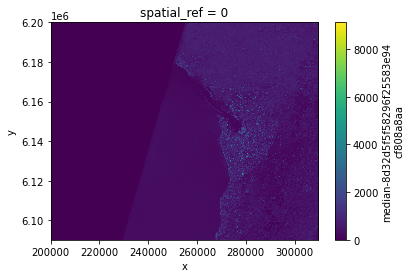

In [41]:
bluemedianNP.plot.imshow();

In [144]:
sentinel_good = ['B02','B03','B04','B05','B06','B07','B08','B8A','B11','B12']

In [142]:
junk['B02'].metadata['gsd']

10

In [143]:
for i in sentinel_good:
    print(junk[i].metadata['gsd'])

10
10
10
20
20
10
20
20
20


In [145]:
sss = junk.stack_bands(sentinel_good)

In [146]:
sss

name: B02_B03_B04_B05_B06_B07_B08_B8A_B11_B12
container: xarray
plugin: ['rasterio']
description: B02, B03, B04, B05, B06, B07, B08, B8A, B11, B12
direct_access: True
user_parameters: []
metadata: 
  concat_dim: band
  urlpath: ['https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/52/H/GH/2020/12/S2B_52HGH_20201231_0_L2A/B02.tif', 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/52/H/GH/2020/12/S2B_52HGH_20201231_0_L2A/B03.tif', 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/52/H/GH/2020/12/S2B_52HGH_20201231_0_L2A/B04.tif', 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/52/H/GH/2020/12/S2B_52HGH_20201231_0_L2A/B05.tif', 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/52/H/GH/2020/12/S2B_52HGH_20201231_0_L2A/B06.tif', 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/52/H/GH/2020/12/S2B_52HGH_20201231_0_L2A/B07.tif', 'https://sentinel-cogs.s3.us-west-2.ama

In [147]:
dasss = sss(chunks=dict(band=1, x=8000, y=2048)).to_dask()

In [149]:
dasss = sss(chunks=dict(band=1, x=2048, y=2048)).to_dask()

In [150]:
dasss

<xarray.DataArray (band: 10, y: 16470, x: 16470)>
dask.array<rechunk-merge, shape=(10, 16470, 16470), dtype=float64, chunksize=(1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 7e+05 7e+05 7e+05 ... 8.097e+05 8.098e+05 8.098e+05
  * y        (y) float64 6.19e+06 6.19e+06 6.19e+06 ... 6.3e+06 6.3e+06 6.3e+06
  * band     (band) <U3 'B02' 'B03' 'B04' 'B05' ... 'B08' 'B8A' 'B11' 'B12'
Attributes:
    transform:           (10.0, 0.0, 699960.0, 0.0, -10.0, 6300040.0)
    crs:                 +init=epsg:32752
    res:                 (10.0, 10.0)
    is_tiled:            1
    nodatavals:          (0.0,)
    scales:              (1.0,)
    offsets:             (0.0,)
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE

In [151]:
junk.datetime

AttributeError: datetime

In [154]:
junk

S2B_52HGH_20201231_0_L2A:
  args:
    stac_obj: !!python/object:satstac.item.Item
      _assets_by_common_name: null
      _collection: !!python/object:satstac.collection.Collection
        _data:
          description: Sentinel-2a and Sentinel-2b imagery, processed to Level 2A
            (Surface Reflectance) and converted to Cloud-Optimized GeoTIFFs
          extent:
            spatial:
              bbox:
              - - -180
                - -90
                - 180
                - 90
            temporal:
              interval:
              - - '2015-06-27T10:25:31.456000Z'
                - null
          id: sentinel-s2-l2a-cogs
          item_assets:
            AOT:
              roles:
              - data
              title: Aerosol Optical Thickness (AOT)
              type: image/tiff; application=geotiff; profile=cloud-optimized
            B01:
              eo:bands:
              - center_wavelength: 0.4439
                common_name: coastal
              

In [155]:
for j in junk:
    print(j)

thumbnail
overview
info
metadata
visual
B01
B02
B03
B04
B05
B06
B07
B08
B8A
B09
B11
B12
AOT
WVP
SCL


In [166]:
junk

S2B_52HGH_20201231_0_L2A:
  args:
    stac_obj: !!python/object:satstac.item.Item
      _assets_by_common_name: null
      _collection: !!python/object:satstac.collection.Collection
        _data:
          description: Sentinel-2a and Sentinel-2b imagery, processed to Level 2A
            (Surface Reflectance) and converted to Cloud-Optimized GeoTIFFs
          extent:
            spatial:
              bbox:
              - - -180
                - -90
                - 180
                - 90
            temporal:
              interval:
              - - '2015-06-27T10:25:31.456000Z'
                - null
          id: sentinel-s2-l2a-cogs
          item_assets:
            AOT:
              roles:
              - data
              title: Aerosol Optical Thickness (AOT)
              type: image/tiff; application=geotiff; profile=cloud-optimized
            B01:
              eo:bands:
              - center_wavelength: 0.4439
                common_name: coastal
              

In [168]:
gf2.iloc[0]['datetime']

'2020-12-31T01:16:33Z'

In [37]:
%%time

# First let's construct a large dataset with all the scenes in our search so that we
# have a time dimension
# Loop through geopandas geodataframe (each row is a STAC ITEM)
import dask

@dask.delayed
def stacitem_to_dataset3(item, datetimeuse):
    print(item)
    #stacked = catalog[item.id].stack_bands(bands)
    stacked = item.stack_bands(['B02','B03','B04','B08'])
    #stacked = item.stack_bands(['B02'])
    da4 = stacked(chunks=dict(band=1, x=2048, y=2048)).to_dask()
    #da = stacked(chunks=dict(band=1, x=5120, y=5120)).to_dask()
    #da['band'] = bands # use common names
    da4['band'] = ['blue','green','red','nir'] # use common names
    #da['band'] = ['blue'] # use common names
    da4 = da4.expand_dims(time=[pd.to_datetime(datetimeuse)])
    #da = stacked(chunks=dict(band=1, x=5120, y=5120, time=-1)).to_dask()
    ds4 = da4.to_dataset(dim='band')
    return ds4

lazy_datasets4 = []
#for i,item in gf.iterrows():
#for i,item in gf.head(1).iterrows():   

for index, x in enumerate(items_s2):
    #need to make items_s2
    #need to get datetime from the dataframe gf2 as well
    datetimeuse = gf2function.iloc[index]['datetime']
    itemx = items_s2[x]
    ds4 = stacitem_to_dataset3(itemx, datetimeuse)
    lazy_datasets4.append(ds4)

from dask.diagnostics import ProgressBar
with ProgressBar():
    #out = dask.compute(*lazy_datasets)
    
#datasets = dask.compute(*lazy_datasets).mean(dim='time')
    datasets4 = dask.compute(*lazy_datasets4)

[                                        ] | 0% Completed |  0.0s<Intake catalog: S2A_54HTG_20180125_0_L2A>
<Intake catalog: S2A_54HTG_20200829_0_L2A>
<Intake catalog: S2A_54HTG_20191216_0_L2A><Intake catalog: S2A_54HTG_20180323_0_L2A>

[                                        ] | 0% Completed |  0.2s
<Intake catalog: S2A_54HTG_20190914_0_L2A>
<Intake catalog: S2A_54HTG_20190301_0_L2A>
<Intake catalog: S2A_54HTG_20190226_0_L2A><Intake catalog: S2A_54HTG_20170226_0_L2A>
<Intake catalog: S2A_54HTG_20190517_0_L2A>

<Intake catalog: S2A_54HTG_20200112_0_L2A>
<Intake catalog: S2A_54HTG_20180909_0_L2A>
[                                        ] | 0% Completed |  2.0s<Intake catalog: S2A_54HTG_20171017_0_L2A>
[#                                       ] | 2% Completed |  3.7s<Intake catalog: S2A_54HTG_20180525_0_L2A>
[##                                      ] | 5% Completed |  6.8s<Intake catalog: S2A_54HTG_20181118_0_L2A>
[###                                     ] | 7% Completed | 18.3s<Intake

In [38]:
datasets4

(<xarray.Dataset>
 Dimensions:  (time: 1, x: 10980, y: 10980)
 Coordinates:
   * time     (time) object 2020-12-20T00:56:43+00:00
   * y        (y) float64 6.2e+06 6.2e+06 6.2e+06 ... 6.09e+06 6.09e+06 6.09e+06
   * x        (x) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05 3.098e+05
 Data variables:
     blue     (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
     green    (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
     red      (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
     nir      (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
 Attributes:
     transform:           (10.0, 0.0, 199980.0, 0.0, -10.0, 6200020.0)
     crs:                 +init=epsg:32754
     res:                 (10.0, 10.0)
     is_tiled:            1
     nodatavals:          (0.0,)
     scales:              (1.0,)
     offsets:             (0.0,)
     AREA_OR_POINT:       Area
     OVR_RESAM

In [39]:
DS4 = xarray.concat(datasets4, dim='time')

In [40]:
DS4

<xarray.Dataset>
Dimensions:  (time: 40, x: 10980, y: 10980)
Coordinates:
  * time     (time) object 1608425803000000000 ... 1485477763000000000
  * y        (y) float64 6.2e+06 6.2e+06 6.2e+06 ... 6.09e+06 6.09e+06 6.09e+06
  * x        (x) float64 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05 3.098e+05
Data variables:
    blue     (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    green    (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    red      (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    nir      (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    transform:           (10.0, 0.0, 199980.0, 0.0, -10.0, 6200020.0)
    crs:                 +init=epsg:32754
    res:                 (10.0, 10.0)
    is_tiled:            1
    nodatavals:          (0.0,)
    scales:              (1.0,)
    offsets:             (0.0,)
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE

In [ ]:
red_median.rio.write_crs('EPSG:32754', inplace=True)
red_medianNP.rio.to_raster("C:/users/rscott/Downloads/red_medianOZ.tif")

In [50]:
def median4(sentinelDS):
    blue_median = median(sentinelDS.blue, dim='time')
    green_median = median(sentinelDS.green, dim='time')
    red_median = median(sentinelDS.red, dim='time')
    nir_median = median(sentinelDS.nir, dim='time')
    
    return (blue_median, green_median, red_median, nir_median)

In [51]:
blue_median, green_median, red_median, nir_median = median4(DS4)
with ProgressBar():
    blue_medianNP = blue_median.compute()
    green_medianNP = green_median.compute()
    red_medianNP = red_median.compute()
    nir_medianNP = nir_median.compute()

[########################################] | 100% Completed |  1hr 30min  9.0s
[########################################] | 100% Completed |  1hr 27min 52.5s
[########################################] | 100% Completed |  1hr 39min  2.3s
[########################################] | 100% Completed |  1hr 21min 50.3s


In [56]:
rasters = [blue_medianNP, green_medianNP, red_medianNP, nir_medianNP]
rasters = [green_medianNP, red_medianNP, nir_medianNP]
raster_files = ['blue_medianOZ.tif','green_medianOZ.tif','red_medianOZ.tif','nir_medianOZ.tif']

for index, rasterNP in enumerate(rasters):
    rasterNP.rio.write_crs('ESPG:32754', inplace=True)
    #rasterNP.rio.to_raster(r"H:\Copa de Cobre" + "\\" + raster_files[index])

CRSError: Invalid projection: ESPG:32754: (Internal Proj Error: proj_create: crs not found)

In [59]:
%%time

# First let's construct a large dataset with all the scenes in our search so that we
# have a time dimension
# Loop through geopandas geodataframe (each row is a STAC ITEM)
import dask

@dask.delayed
def stacitem_to_dataset3(item, datetimeuse):
    print(item)
    #stacked = catalog[item.id].stack_bands(bands)
    stacked = item.stack_bands(['B05','B06','B07','B8A','B11','B12'])
    da6 = stacked(chunks=dict(band=1, x=2048, y=2048)).to_dask()
    da6['band'] = ['B05','B06','B07','B8A','B11','B12'] # use common names
    da6 = da6.expand_dims(time=[pd.to_datetime(datetimeuse)])
    ds6 = da6.to_dataset(dim='band')
    return ds6

lazy_datasets6 = []
#for i,item in gf.iterrows():
#for i,item in gf.head(1).iterrows():   

for index, x in enumerate(items_s2):
    #need to make items_s2
    #need to get datetime from the dataframe gf2 as well
    datetimeuse = gf2function.iloc[index]['datetime']
    itemx = items_s2[x]
    ds6 = stacitem_to_dataset3(itemx, datetimeuse)
    lazy_datasets6.append(ds6)

from dask.diagnostics import ProgressBar
with ProgressBar():
    #out = dask.compute(*lazy_datasets)
    
#datasets = dask.compute(*lazy_datasets).mean(dim='time')
    datasets6 = dask.compute(*lazy_datasets6)

[                                        ] | 0% Completed |  0.0s<Intake catalog: S2A_54HTG_20200204_0_L2A>
<Intake catalog: S2A_54HTG_20190120_0_L2A>
<Intake catalog: S2A_54HTG_20190517_0_L2A>
<Intake catalog: S2A_54HTG_20191216_0_L2A>
<Intake catalog: S2A_54HTG_20170308_0_L2A>
<Intake catalog: S2A_54HTG_20190709_0_L2A>
[                                        ] | 0% Completed |  0.1s<Intake catalog: S2A_54HTG_20190226_0_L2A>
<Intake catalog: S2A_54HTG_20170127_0_L2A>
<Intake catalog: S2A_54HTG_20200112_0_L2A>
<Intake catalog: S2A_54HTG_20170619_0_L2A><Intake catalog: S2A_54HTG_20180323_0_L2A>
<Intake catalog: S2A_54HTG_20200610_0_L2A>

[                                        ] | 0% Completed |  1min 34.3s<Intake catalog: S2A_54HTG_20191024_0_L2A>
[#                                       ] | 2% Completed |  1min 36.1s<Intake catalog: S2A_54HTG_20201117_0_L2A>
<Intake catalog: S2A_54HTG_20181118_0_L2A>
<Intake catalog: S2A_54HTG_20200723_0_L2A><Intake catalog: S2A_54HTG_20190914_0_L2A

In [71]:
def median6(sentinelDS):
    b05_median = median(sentinelDS.B05, dim='time')
    b06_median = median(sentinelDS.B06, dim='time')
    b07_median = median(sentinelDS.B07, dim='time')
    b08a_median = median(sentinelDS.B8A, dim='time')
    b11_median = median(sentinelDS.B11, dim='time')
    b12_median = median(sentinelDS.B12, dim='time')
    
    return (b05_median, b06_median, b07_median, b08a_median, b11_median, b12_median)

In [72]:
DS6 = xarray.concat(datasets6, dim='time')

In [73]:
DS6

<xarray.Dataset>
Dimensions:  (time: 40, x: 5490, y: 5490)
Coordinates:
  * time     (time) object 1608425803000000000 ... 1485477763000000000
  * y        (y) float64 6.2e+06 6.2e+06 6.2e+06 ... 6.09e+06 6.09e+06 6.09e+06
  * x        (x) float64 2e+05 2e+05 2e+05 ... 3.097e+05 3.098e+05 3.098e+05
Data variables:
    B05      (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B06      (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B07      (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B8A      (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B11      (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    B12      (time, y, x) uint16 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    transform:           (20.0, 0.0, 199980.0, 0.0, -20.0, 6200020.0)
    crs:                 +init=epsg:32754
    res:                 (20.0, 20.0)
    is_tiled:            1
    nodatavals:          (0.0,)
    scales:              (1.0,)
    offsets:             (0.0,)
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE

In [74]:
b05_median, b06_median, b07_median, b08a_median, b11_median, b12_median = median6(DS6)
with ProgressBar():
    b05_medianNP = b05_median.compute()
    b06_medianNP = b06_median.compute()
    b07_medianNP = b07_median.compute()
    b08a_medianNP = b08a_median.compute()
    b11_medianNP = b11_median.compute()
    b12_medianNP = b12_median.compute()


[########################################] | 100% Completed | 18min 44.7s
[########################################] | 100% Completed | 19min 35.5s
[########################################] | 100% Completed | 19min 44.7s
[########################################] | 100% Completed | 19min 47.2s
[########################################] | 100% Completed | 20min 45.8s
[########################################] | 100% Completed | 19min 41.6s


In [79]:
rasters6 = [b05_medianNP, b06_medianNP, b07_medianNP, b08a_medianNP, b11_medianNP, b12_medianNP]
raster_files6 = ['b05_medianOZ.tif','b06_medianOZ.tif','b07_medianOZ.tif','b8a_medianOZ.tif','b11_medianOZ.tif','b12_medianOZ.tif']

import rasterio
import rioxarray

for index, rasterNP in enumerate(rasters6):
    #rasterNP.rio.write_crs('ESPG:32754', inplace=True)
    rasterNP.rio.to_raster(r"H:\Copa de Cobre" + "\\" + raster_files6[index])